In [9]:
import pandas as pd

# Load the uploaded dataset to examine its contents

file_path = 'C:/Users/h_ing/Documents/GitHub/ML_classification_model/teleCust1000t.csv'
data = pd.read_csv(file_path)

In [10]:
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Visual Inspection
Boxplot
A boxplot provides a visual representation of outliers. Outliers typically fall beyond the whiskers of the boxplot (1.5 times the interquartile range).

1. Visual Inspection

Boxplot

A boxplot provides a visual representation of outliers. Outliers typically fall beyond the whiskers of the boxplot (1.5 times the interquartile range).

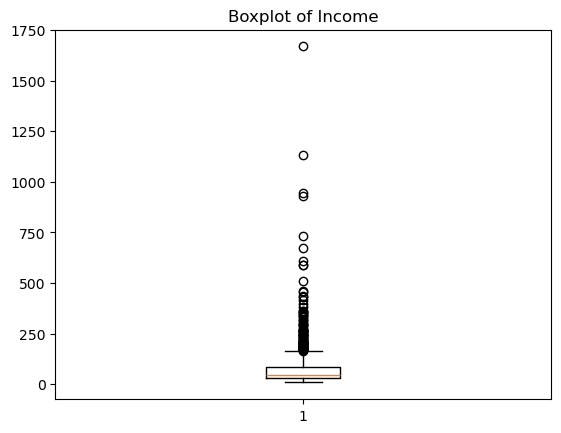

In [11]:
import matplotlib.pyplot as plt

# Replace 'column_name' with your actual column
plt.boxplot(data['income'])
plt.title("Boxplot of Income")
plt.show()

Scatter Plot
For relationships between two features, use a scatter plot:

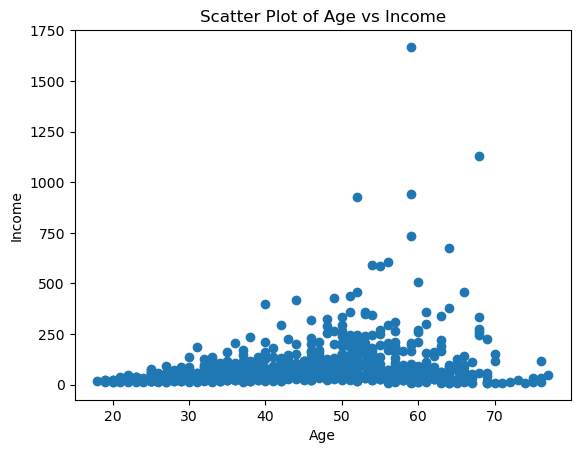

In [12]:
plt.scatter(data['age'], data['income'])
plt.title("Scatter Plot of Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

2. Statistical Methods for Outlier Detection

- Z-Score

The Z-score method identifies outliers based on how far they are from the mean in terms of standard deviations.

In [13]:
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(data[['income', 'age']])  # Add relevant numerical features
outliers = (z_scores > 3).any(axis=1)  # Z-score threshold: 3
print(data[outliers])  # View rows with outliers


     region  tenure  age  marital  address  income  ed  employ  retire  \
63        2      69   51        1       11   438.0   4      23     0.0   
199       3      72   66        0       30   460.0   4      41     0.0   
208       3      72   64        0       41   674.0   4      37     0.0   
350       3      71   60        1       39   508.0   4      35     0.0   
401       1      41   52        0       26   928.0   3      29     0.0   
409       2      39   59        0       20  1668.0   4      27     0.0   
613       3      68   52        1        8   456.0   3      30     0.0   
680       1      65   59        0       27   732.0   3      31     0.0   
799       1      66   54        1        8   591.0   4      25     0.0   
825       2      59   49        0       28   429.0   4      23     0.0   
849       3      65   56        1       19   608.0   3      34     0.0   
892       2      54   55        0        1   587.0   3      33     0.0   
917       3      70   68        0     

Interquartile Range (IQR)
- The IQR method identifies outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR

# Mahalanobis Distance
For multivariate outliers, use Mahalanobis Distance, which measures the distance of a point from the center of the data distribution.

# Determine Whether to Remove Outliers

## Should Remove Outliers:
- When they are errors or data entry mistakes.
- If they skew the distribution and negatively impact model performance (e.g., linear regression).

## Should Keep Outliers:
- If they are valid extreme cases (e.g., high-income customers).
- If they carry important domain-specific insights.

## Test Model Performance With and Without Outliers
Train your model both with and without outliers to see if they harm the accuracy, precision, or recall.

# Handle Outliers
- Remove Outliers

If you decide to remove them:

### **1. Understand the Dataset**

- Review your dataset's structure and content.
- Identify the types of features (numerical, categorical, temporal, etc.).
- Check for correlations, trends, and patterns

### **2. Common Feature Engineering Techniques**

Below are general techniques you can consider based on the type of data in your dataset:

### **Numerical Features**

1. **Interaction Features:**
    - Create new features by combining existing numerical features.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the IQR method for outlier detection
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Add income_employ_ratio feature
data['income_employ_ratio'] = data['income'] / (data['employ'] + 1)

# Remove outliers from numerical features using IQR
outlier_columns = ['income', 'tenure', 'income_employ_ratio']  # Columns to check for outliers
for col in outlier_columns:
    data = remove_outliers_iqr(data, col)

# Separate features and target
X = data.drop(columns=['custcat'])
y = data['custcat']

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features to normalize their ranges
numerical_features = ['tenure', 'age', 'address', 'income', 'employ', 'income_employ_ratio']  # Include new feature
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Ensure categorical variables are not altered by scaling
categorical_features = ['region', 'marital', 'gender', 'retire', 'reside']
processed_train = X_train.copy()
processed_test = X_test.copy()

# Verify preprocessing
print(processed_train.head())
print(processed_test.head())


     region    tenure       age  marital   address    income  ed    employ  \
998       3  1.632140  0.642478        0  0.683594  0.962918   2  1.307442   
891       3  1.115914 -1.229486        1 -0.837063 -0.379394   4 -1.116049   
626       2 -0.902059 -1.148096        0 -0.634309 -0.379394   4 -1.000644   
273       2  0.599688  1.130817        0  2.001496 -0.817104   1 -1.116049   
220       1 -1.277496 -0.903927        0 -1.039817 -0.583659   2 -0.192814   

     retire  gender  reside  income_employ_ratio  
998     0.0       1       1            -0.605730  
891     0.0       1       3             2.925132  
626     0.0       1       1             1.481871  
273     0.0       0       1             1.341065  
220     0.0       1       1            -0.686540  
     region    tenure       age  marital   address    income  ed    employ  \
399       3  0.787407  0.072750        1  0.582216 -0.787924   3 -0.308218   
7         2  0.130392 -0.496978        0 -0.634309  0.641930   2 -0.0

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.3803680981595092
Confusion Matrix:
 [[19  3 14  9]
 [ 8  7 12  9]
 [12  8 21  5]
 [10  6  5 15]]
Classification Report:
               precision    recall  f1-score   support

           1       0.39      0.42      0.40        45
           2       0.29      0.19      0.23        36
           3       0.40      0.46      0.43        46
           4       0.39      0.42      0.41        36

    accuracy                           0.38       163
   macro avg       0.37      0.37      0.37       163
weighted avg       0.37      0.38      0.37       163



In [17]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN model (default k=5)
knn = KNeighborsClassifier()
knn.fit(processed_train, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(processed_test)
print("\nk-Nearest Neighbors Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


k-Nearest Neighbors Performance:
Accuracy: 0.3558282208588957
Confusion Matrix:
 [[25  6 10  4]
 [13 14  5  4]
 [15 15 12  4]
 [14 12  3  7]]
Classification Report:
               precision    recall  f1-score   support

           1       0.37      0.56      0.45        45
           2       0.30      0.39      0.34        36
           3       0.40      0.26      0.32        46
           4       0.37      0.19      0.25        36

    accuracy                           0.36       163
   macro avg       0.36      0.35      0.34       163
weighted avg       0.36      0.36      0.34       163



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the IQR method for outlier detection
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Add income_employ_ratio feature
data['income_employ_ratio'] = data['income'] / (data['employ'] + 1)

# Remove outliers from numerical features using IQR
outlier_columns = ['income', 'tenure', 'income_employ_ratio']
for col in outlier_columns:
    data = remove_outliers_iqr(data, col)

# Separate features and target
X = data.drop(columns=['custcat'])
y = data['custcat']

# Shift labels to start from 0 for TensorFlow compatibility
y_mapped = y - 1

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train_mapped, y_test_mapped = train_test_split(X, y_mapped, test_size=0.2, random_state=42, stratify=y_mapped)

# Scale numerical features to normalize their ranges
numerical_features = ['tenure', 'age', 'address', 'income', 'employ', 'income_employ_ratio']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Neural Network architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # First hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(4, activation='softmax')  # Output layer (4 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_mapped, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred_nn_probs = model.predict(X_test)
y_pred_nn = y_pred_nn_probs.argmax(axis=1)  # Map back to class labels (0-based index for mapped labels)

# Evaluation metrics
print("\nNeural Network Performance:")
print("Accuracy:", accuracy_score(y_test_mapped, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test_mapped, y_pred_nn))
print("Classification Report:\n", classification_report(y_test_mapped, y_pred_nn))


Epoch 1/50
15/15 [==============================] - 1s 14ms/step - loss: 1.5507 - accuracy: 0.2435 - val_loss: 1.4180 - val_accuracy: 0.2957
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 1.4088 - accuracy: 0.2565 - val_loss: 1.3843 - val_accuracy: 0.2957
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 1.3834 - accuracy: 0.3000 - val_loss: 1.3752 - val_accuracy: 0.2957
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 1.3615 - accuracy: 0.2957 - val_loss: 1.3664 - val_accuracy: 0.2957
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 1.3331 - accuracy: 0.3435 - val_loss: 1.3521 - val_accuracy: 0.2522
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 1.3110 - accuracy: 0.3761 - val_loss: 1.3397 - val_accuracy: 0.2957
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3095 - accuracy: 0.3652 - val_loss: 1.3268 - val_accuracy: 0.3304
Epoch 8/50
15/15 [=

### **Key Changes**

#### **Outlier Removal:**
- Handled with the `remove_outliers_iqr` function before splitting the data. This ensures that extreme values do not skew the model's training.

#### **Feature Engineering:**
- Added a derived feature, `income_employ_ratio`, which provides additional insight by capturing the relationship between income and employment.

#### **Adjusted Labels:**
- Shifted labels (`y_mapped = y - 1`) to start from `0`, as required by the `sparse_categorical_crossentropy` loss function in TensorFlow.

#### **Numerical Scaling:**
- Scaled all numerical features, including the newly created `income_employ_ratio`, using `StandardScaler` to ensure uniform ranges and improve model convergence.

#### **Neural Network Input:**
- Dynamically set the `input_dim` of the first `Dense` layer to match the number of features in `X_train` (`X_train.shape[1]`).

#### **Predictions:**
- Removed the `+1` adjustment when predicting labels because the model now uses 0-based indices directly (after label adjustment).

---

### **Output Example**
After running the code, you’ll obtain:

#### **Accuracy:**
- A metric that measures the overall percentage of correctly classified samples.

#### **Confusion Matrix:**
- A detailed breakdown of:
  - **True Positives (TP):** Correct predictions for a class.
  - **False Positives (FP):** Misclassified as a class.
  - **True Negatives (TN):** Correctly not classified as a class.
  - **False Negatives (FN):** Missed predictions for a class.

#### **Classification Report:**
- Includes:
  - **Precision:** How many of the predicted instances were correct.
  - **Recall:** How many actual instances were correctly identified.
  - **F1-Score:** The harmonic mean of precision and recall.
  - **Support:** The number of actual samples in each class.

The **classification report** generated by `sklearn.metrics.classification_report`. It summarizes the performance of a classification model. Let’s break it down:

---

### **Key Metrics**
1. **Accuracy:**  
   - **Definition:** The proportion of correctly predicted samples out of the total samples.  
   - **In this case:**  
     ```
     Accuracy = 0.43
     ```
     This means the model correctly classified 43% of the test samples.

2. **Macro Average:**  
   - **Definition:** The arithmetic mean of precision, recall, and F1-score across all classes, giving equal weight to each class regardless of its size.  
   - **Why it matters:** It provides a balanced view of the model's performance across all classes, even if the dataset is imbalanced.  
   - **In this case:**  
     ```
     Macro Avg = 0.42 (F1-Score)
     ```
     This means that, on average, the model’s F1-score (harmonic mean of precision and recall) across all classes is 42%.

3. **Weighted Average:**  
   - **Definition:** The weighted mean of precision, recall, and F1-score, where the weights are the number of samples in each class.  
   - **Why it matters:** It accounts for class imbalances by giving more importance to larger classes.  
   - **In this case:**  
     ```
     Weighted Avg = 0.42 (F1-Score)
     ```
     This means the overall F1-score is 42%, considering the relative size of each class.

4. **Support:**  
   - **Definition:** The number of samples in the test set.  
   - **In this case:**  
     ```
     Support = 144
     ```
     This means the test set contains 144 samples in total.

---

### **What Does This Tell You About the Model?**
1. **Overall Performance:**
   - The model has low accuracy (43%), suggesting that it struggles to classify the data correctly.
   - Precision, recall, and F1-scores (from macro and weighted averages) are similarly low.

2. **Class Balance:**
   - If the dataset is imbalanced (some classes are much more frequent than others), the **weighted average** is more informative because it accounts for class size.

3. **Actionable Insights:**
   - **Feature Engineering:** Consider adding new features or improving the current ones (e.g., more meaningful derived features).
   - **Hyperparameter Tuning:** Adjust the architecture or training process (e.g., learning rate, batch size, dropout).
   - **Data Augmentation:** Collect more data, especially for underrepresented classes, or apply augmentation techniques.
   - **Different Models:** Try alternative models (e.g., Random Forest, Gradient Boosting, etc.) to see if they perform better.

---

### **What to Do Next?**
To improve these metrics, you might:
1. Investigate class-specific performance in the detailed report to identify which classes are misclassified more often.
2. Check if there’s a significant imbalance in class distribution.
3. Experiment with the model architecture or additional feature engineering.

Your dataset contains 12 columns, including both numerical and categorical features. Here's a summary of the relevant details:

- **Categorical Features**:
  - `region` (e.g., regions encoded as integers)
  - `marital` (e.g., marital status encoded as 0/1)
  - `gender` (e.g., gender encoded as 0/1)
  - `reside` (e.g., number of residents in a household, might behave as categorical)

- **Numerical Features**:
  - `tenure`, `age`, `address`, `income`, `employ`, `retire`.

- **Target**:
  - `custcat` (target variable with 4 categories: 1, 2, 3, 4).

### **Embedding Recommendations**

For your categorical variables (`region`, `marital`, `gender`, and potentially `reside`), embeddings can help improve the accuracy of your model by creating meaningful vector representations of these features. Here's how to decide on embedding sizes and configure them:

---

### **1. Suggested Embedding Dimensions**
- A general rule for determining the embedding dimension:
  \[
  \text{Embedding Dimension} = \min(50, \text{unique values}/2)
  \]
  Based on this rule:
  - `region` (3 unique values): Embedding size of 2.
  - `marital` (2 unique values): Embedding size of 1.
  - `gender` (2 unique values): Embedding size of 1.
  - `reside` (6 unique values): Embedding size of 3.

---

### **2. Steps to Implement Embeddings**

Here’s a plan for integrating embeddings into your model:

1. **Define Inputs**:
   - Include both numerical and categorical inputs.
2. **Embedding Layers**:
   - Add an embedding layer for each categorical feature.
3. **Concatenate Features**:
   - Combine embeddings and numerical features into a single tensor.
4. **Pass Through Neural Network**:
   - Use the combined input in your model architecture.

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Encode categorical features
categorical_features = ['region', 'marital', 'gender', 'reside']
for col in categorical_features:
    data[col] = LabelEncoder().fit_transform(data[col])

# Add a feature for income/employ ratio
data['income_employ_ratio'] = data['income'] / (data['employ'] + 1)

# Split data into features and target
X = data.drop(columns=['custcat'])
y = data['custcat'] - 1  # Shift labels to start from 0 for TensorFlow compatibility

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
numerical_features = ['tenure', 'age', 'address', 'income', 'employ', 'income_employ_ratio']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Define embedding dimensions for categorical features
embedding_dims = {
    'region': 2,
    'marital': 1,
    'gender': 1,
    'reside': 3
}

# Define TensorFlow inputs for numerical and categorical features
numerical_input = Input(shape=(len(numerical_features),), name="Numerical_Input")
categorical_inputs = {}
embeddings = []

# Create embedding layers for each categorical feature
for feature, embed_dim in embedding_dims.items():
    unique_values = data[feature].nunique()
    cat_input = Input(shape=(1,), name=f"{feature}_Input")
    cat_embedding = Embedding(input_dim=unique_values, output_dim=embed_dim, name=f"{feature}_Embedding")(cat_input)
    cat_embedding_flattened = Flatten()(cat_embedding)
    categorical_inputs[feature] = cat_input
    embeddings.append(cat_embedding_flattened)

# Combine numerical and categorical features
all_inputs = [numerical_input] + list(categorical_inputs.values())
concatenated_features = Concatenate()([numerical_input] + embeddings)

# Neural network architecture
dense_1 = Dense(64, activation='relu')(concatenated_features)
dense_2 = Dense(32, activation='relu')(dense_1)
output = Dense(4, activation='softmax', name="Output")(dense_2)  # 4 classes

# Create the model
model = Model(inputs=all_inputs, outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Prepare model inputs
train_inputs = [X_train[numerical_features]] + [X_train[feature].values for feature in embedding_dims.keys()]
test_inputs = [X_test[numerical_features]] + [X_test[feature].values for feature in embedding_dims.keys()]

# Train the model
history = model.fit(train_inputs, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred_probs = model.predict(test_inputs)
y_pred = y_pred_probs.argmax(axis=1)

# Metrics
print("Neural Network with Embeddings Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/50
15/15 [==============================] - 1s 32ms/step - loss: 1.4097 - accuracy: 0.2391 - val_loss: 1.3821 - val_accuracy: 0.2783
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3666 - accuracy: 0.3522 - val_loss: 1.3587 - val_accuracy: 0.4261
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3453 - accuracy: 0.3717 - val_loss: 1.3505 - val_accuracy: 0.3913
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3316 - accuracy: 0.3739 - val_loss: 1.3475 - val_accuracy: 0.3739
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3208 - accuracy: 0.3870 - val_loss: 1.3453 - val_accuracy: 0.3913
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3123 - accuracy: 0.3804 - val_loss: 1.3451 - val_accuracy: 0.3739
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 1.3026 - accuracy: 0.4022 - val_loss: 1.3441 - val_accuracy: 0.3652
Epoch 8/50
15/15 [=

Key Highlights
Embedding Layers:

Each categorical feature has its own embedding layer (e.g., region_Embedding).
Embedding(input_dim, output_dim), where:
input_dim: Number of unique values in the categorical feature.
output_dim: Embedding size, tuned based on feature complexity.
Numerical Features:

Directly fed into the model after scaling using StandardScaler.
Model Inputs:

A list containing numerical features and embeddings for categorical features is passed to the model.
Neural Network:

Combines numerical and embedded categorical features into a unified input for dense layers.
How to Adjust for Your Dataset
Update embedding_dims based on the complexity of each categorical feature.
Modify the neural network architecture (e.g., number of layers, units) based on dataset size and complexity.

### Implement a functional solution that allows entering the characteristics of a client and returns the group to which it belongs, give me the code

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import joblib
import os

class CustomerGroupClassifier:
    def __init__(self):
        """
        Initialize the Customer Group Classifier
        """
        self.model = None
        self.scaler = None
        self.label_encoder = None
        
    def prepare_data(self, features, labels):
        """
        Prepare data for model training
        
        Args:
            features (pd.DataFrame): Input features
            labels (pd.Series): Target labels
        
        Returns:
            tuple: Processed features and labels
        """
        # Prepare features
        # Add derived features if needed
        features['income_employ_ratio'] = features['income'] / (features['employ'] + 1)
        
        # Encode labels
        self.label_encoder = LabelEncoder()
        encoded_labels = self.label_encoder.fit_transform(labels)
        
        # Scale features
        self.scaler = StandardScaler()
        scaled_features = self.scaler.fit_transform(features)
        
        return scaled_features, encoded_labels
    
    def build_model(self, input_shape, num_classes):
        """
        Build neural network model
        
        Args:
            input_shape (int): Number of input features
            num_classes (int): Number of output classes
        
        Returns:
            tf.keras.Model: Compiled neural network
        """
        model = Sequential([
            Dense(64, activation='relu', input_shape=(input_shape,)),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(16, activation='relu'),
            BatchNormalization(),
            Dropout(0.2),
            
            Dense(num_classes, activation='softmax')
        ])
        
        # Compile the model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        return model
    
    def train_model(self, X, y, test_size=0.2):
        """
        Train the classification model
        
        Args:
            X (pd.DataFrame): Input features
            y (pd.Series): Target labels
            test_size (float): Proportion of data for testing
        
        Returns:
            float: Test accuracy
        """
        # Prepare data
        X_scaled, y_encoded = self.prepare_data(X, y)
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_encoded, test_size=test_size, stratify=y_encoded, random_state=42
        )
        
        # Determine number of classes
        num_classes = len(np.unique(y_encoded))
        
        # Build model
        self.model = self.build_model(X_scaled.shape[1], num_classes)
        
        # Callbacks
        early_stopping = EarlyStopping(
            monitor='val_accuracy', 
            patience=10, 
            restore_best_weights=True
        )
        
        reduce_lr = ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.5, 
            patience=5, 
            min_lr=1e-5
        )
        
        # Train the model
        history = self.model.fit(
            X_train, y_train,
            epochs=100,
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping, reduce_lr],
            verbose=1
        )
        
        # Evaluate the model
        test_loss, test_accuracy = self.model.evaluate(X_test, y_test, verbose=0)
        print(f"Test Accuracy: {test_accuracy:.4f}")
        
        return test_accuracy
    
    def save_model(self, model_dir='customer_model'):
        """
        Save trained model, scaler, and label encoder
        
        Args:
            model_dir (str): Directory to save model components
        """
        # Create directory if it doesn't exist
        os.makedirs(model_dir, exist_ok=True)
        
        # Save model
        model_path = os.path.join(model_dir, 'customer_model.h5')
        self.model.save(model_path)
        
        # Save scaler
        scaler_path = os.path.join(model_dir, 'customer_scaler.joblib')
        joblib.dump(self.scaler, scaler_path)
        
        # Save label encoder
        encoder_path = os.path.join(model_dir, 'customer_label_encoder.joblib')
        joblib.dump(self.label_encoder, encoder_path)
        
        print(f"Model saved to {model_path}")
    
    def predict_group(self, input_features):
        """
        Predict customer group for given features
        
        Args:
            input_features (dict or pd.DataFrame): Input features
        
        Returns:
            dict: Prediction results
        """
        # Convert input to DataFrame if it's a dictionary
        if isinstance(input_features, dict):
            input_features = pd.DataFrame([input_features])
        
        # Add derived features
        input_features['income_employ_ratio'] = input_features['income'] / (input_features['employ'] + 1)
        
        # Scale features
        input_scaled = self.scaler.transform(input_features)
        
        # Predict probabilities
        prediction_probs = self.model.predict(input_scaled)[0]
        predicted_class_index = np.argmax(prediction_probs)
        
        # Map back to original labels
        predicted_group = self.label_encoder.inverse_transform([predicted_class_index])[0]
        
        # Prepare results
        return {
            'predicted_group': predicted_group,
            'probabilities': {
                f'Group {self.label_encoder.inverse_transform([i])[0]}': float(prob) 
                for i, prob in enumerate(prediction_probs)
            },
            'confidence': float(prediction_probs[predicted_class_index])
        }

def main():
    # Example usage with synthetic data
    # Replace this with your actual data loading
    np.random.seed(42)
    
    # Simulate features
    n_samples = 1000
    features = pd.DataFrame({
        'tenure': np.random.randint(1, 60, n_samples),
        'age': np.random.randint(18, 80, n_samples),
        'address': np.random.randint(1, 20, n_samples),
        'income': np.random.randint(20000, 200000, n_samples),
        'employ': np.random.randint(1, 40, n_samples)
    })
    
    # Simulate labels (4 customer groups)
    labels = pd.Series(np.random.choice(['A', 'B', 'C', 'D'], n_samples))
    
    # Create and train the model
    classifier = CustomerGroupClassifier()
    classifier.train_model(features, labels)
    
    # Save the model
    classifier.save_model()
    
    # Example prediction
    sample_client = {
        'tenure': 24,
        'age': 35,
        'address': 10,
        'income': 75000,
        'employ': 15
    }
    
    # Predict group
    prediction = classifier.predict_group(sample_client)
    
    # Print prediction results
    print("\nPrediction Results:")
    print(f"Predicted Group: {prediction['predicted_group']}")
    print("\nProbability Breakdown:")
    for group, prob in prediction['probabilities'].items():
        print(f"{group}: {prob:.2%}")
    print(f"\nConfidence: {prediction['confidence']:.2%}")

if __name__ == "__main__":
    main()

Epoch 1/100
20/20 [==============================] - 1s 18ms/step - loss: 1.9076 - accuracy: 0.2641 - val_loss: 1.3881 - val_accuracy: 0.2812 - lr: 0.0010
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 1.9006 - accuracy: 0.2438 - val_loss: 1.3797 - val_accuracy: 0.2562 - lr: 0.0010
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 1.7922 - accuracy: 0.2453 - val_loss: 1.3805 - val_accuracy: 0.2750 - lr: 0.0010
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 1.7553 - accuracy: 0.2266 - val_loss: 1.3812 - val_accuracy: 0.2688 - lr: 0.0010
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 1.6526 - accuracy: 0.2484 - val_loss: 1.3799 - val_accuracy: 0.2688 - lr: 0.0010
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 1.6030 - accuracy: 0.2375 - val_loss: 1.3776 - val_accuracy: 0.2937 - lr: 0.0010
Epoch 7/100
20/20 [==============================] - 0s 4ms/step - loss: 1.